## CSS.205.1 Toolkit for TCS 2023 - Spectral Methods

Jupyter Notebook for Spectral Methods module of course using the tools developed by Dan Spielman. References and sources:
* <a href="http://www.cs.yale.edu/homes/spielman/462/462schedule.html">Dan Spielman's course on Spectral Methods @ Yale University, 2019</a>.
* <a href="https://github.com/danspielman/Laplacians.jl">Laplacians Package</a> (by Dan Spielman)

If you want to try using this, you will need to install Jupyter (via Python), Julia and IJulia. You also need Spielman's package, called Laplacians.jl. It may be added in Julia via

Using Pkg
Pkg.add("Laplacians")


### Table of Contents

1. <a href="#Line-Graphs">Line Graphs</a>

2. <a href="#Grid-Graphs">Grid Graphs</a>

3. <a href="#Platonic-Solids">Platonic Solids</a>



In [1]:
using Laplacians
using LinearAlgebra
using Plots
using SparseArrays
using FileIO
using JLD2
using Random

In [2]:
gr()

Plots.GRBackend()

# Paths / Cycles

Commands for generating path and cycles
* line: path_graph(#vertices)
* cycle: ring_graph(#vertices)
* Complete Bipartite graph on (n,n) vertices: complete_bipartite_graph(n)
* Star Graph: star_graph(#vertices)


In [3]:
n=12
M = ring_graph(n)

12×12 SparseMatrixCSC{Float64, Int64} with 24 stored entries:
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0
 1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 

In [4]:
Matrix(M)

12×12 Matrix{Float64}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [5]:
L=Matrix(lap(M))

12×12 Matrix{Float64}:
  2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0
 -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0  -1.0
 -1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   2.0

In [6]:
E = eigen(Matrix(L))
println(E.values)

[-5.0813954256430024e-17, 0.2679491924311225, 0.2679491924311246, 0.9999999999999978, 1.0000000000000022, 1.9999999999999982, 2.0000000000000018, 2.9999999999999982, 3.0, 3.732050807568871, 3.732050807568877, 3.999999999999996]


In [7]:
E.vectors[:,1]

12-element Vector{Float64}:
 -0.2886751345948131
 -0.2886751345948125
 -0.2886751345948128
 -0.28867513459481275
 -0.2886751345948125
 -0.28867513459481225
 -0.28867513459481275
 -0.2886751345948132
 -0.2886751345948131
 -0.28867513459481264
 -0.2886751345948132
 -0.28867513459481364

In [8]:
v2 = E.vectors[:,2]

12-element Vector{Float64}:
  0.35355339059327384
  0.20412414523193048
 -4.411591051069787e-16
 -0.20412414523193162
 -0.3535533905932736
 -0.4082482904638627
 -0.35355339059327395
 -0.20412414523193217
 -7.372821896687958e-16
  0.2041241452319304
  0.35355339059327373
  0.4082482904638639

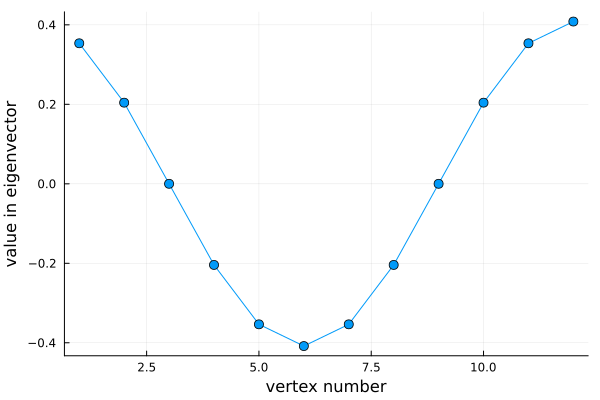

In [9]:
plot(v2,marker=5,legend=false)
xlabel!("vertex number")
ylabel!("value in eigenvector")

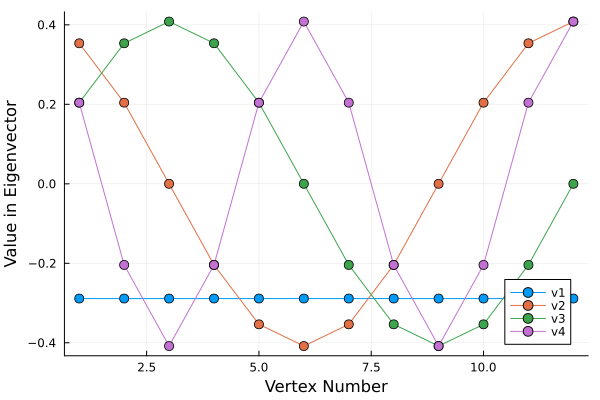

In [10]:
plot(E.vectors[:,1],label="v1",marker = 5)
plot!(E.vectors[:,2],label="v2",marker = 5)
plot!(E.vectors[:,3],label="v3",marker = 5)
plot!(E.vectors[:,4],label="v4",marker = 5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

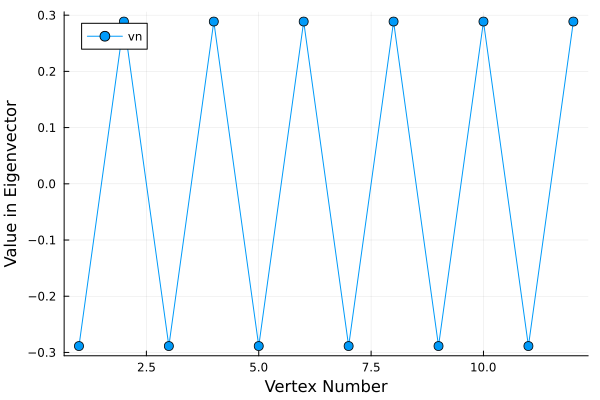

In [11]:
Plots.plot(E.vectors[:,n],label="vn",marker=5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

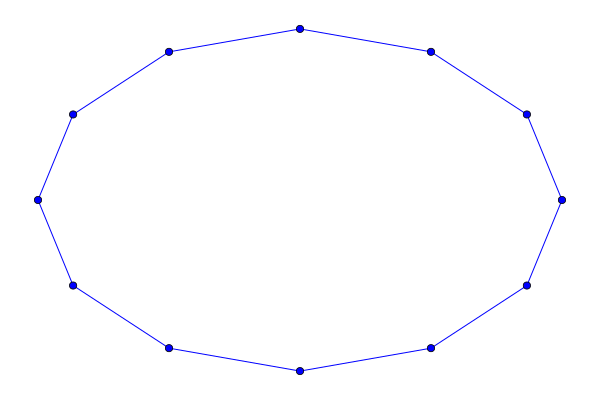

In [12]:
V = E.vectors[:,2:3]
plot_graph(M,V[:,1],V[:,2]);

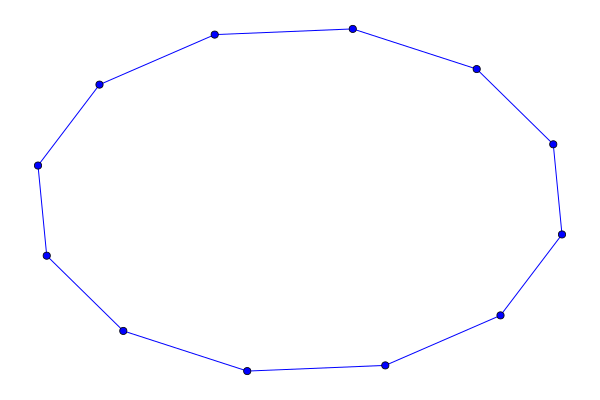

In [13]:
spectral_drawing(M);

# Grid Graphs

Commands for generating grids
* n1xn2 2-d grid: grid2(n1,n2)
* n1xn2xn3 3-d grid: grid3(n1,n2,n3)

In [14]:
M = grid2(6,6)
L = lap(M)
E = eigen(Matrix(L))
V = E.vectors[:,2:3]

36×2 Matrix{Float64}:
 -0.319588     0.0391375
 -0.282015    -0.00892256
 -0.216936    -0.092165
 -0.141789    -0.188285
 -0.0767107   -0.271528
 -0.0391375   -0.319588
 -0.271528     0.0767107
 -0.233954     0.0286506
 -0.168876    -0.0545918
 -0.0937294   -0.150712
 -0.0286506   -0.233954
  0.00892256  -0.282015
 -0.188285     0.141789
  ⋮           
 -0.00892256   0.282015
  0.0286506    0.233954
  0.0937294    0.150712
  0.168876     0.0545918
  0.233954    -0.0286506
  0.271528    -0.0767107
  0.0391375    0.319588
  0.0767107    0.271528
  0.141789     0.188285
  0.216936     0.092165
  0.282015     0.00892256
  0.319588    -0.0391375

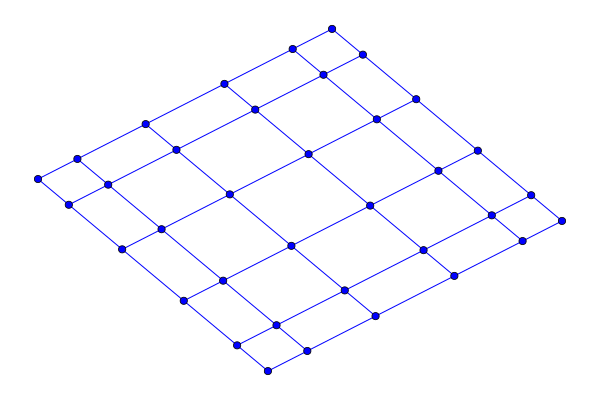

In [15]:
plot_graph(M,V[:,1],V[:,2]);

In [16]:
M = grid3(5,5,5)
L = lap(M)
E = eigen(Matrix(L))
V = E.vectors[:,2:4]
E.values

125-element Vector{Float64}:
 -1.2450300514738805e-15
  0.381966011250105
  0.38196601125010554
  0.3819660112501058
  0.7639320225002089
  0.7639320225002092
  0.7639320225002117
  1.145898033750316
  1.381966011250106
  1.3819660112501062
  1.381966011250107
  1.7639320225002078
  1.7639320225002098
  ⋮
  7.618033988749906
  7.854101966249687
  8.618033988749897
  8.618033988749902
  8.618033988749906
  8.854101966249669
  8.854101966249685
  8.854101966249685
  9.854101966249683
  9.854101966249686
  9.854101966249688
 10.854101966249683

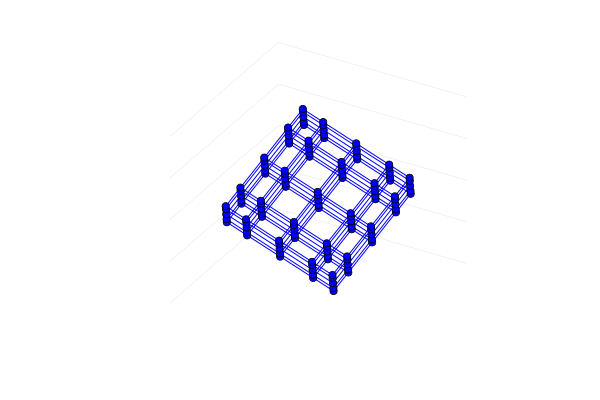

In [17]:
plot_graph(M, V[:,1],V[:,2],V[:,3],setaxis=false);

In [18]:
plotlyjs()
plot_graph(M, V[:,1],V[:,2],V[:,3]; setaxis=false);

WebIO._IJuliaInit()

# Platonic Solids (https://en.wikipedia.org/wiki/Platonic_solid)

* Tetrahedron (https://en.wikipedia.org/wiki/Tetrahedron): tetra.txt
* Cube (https://en.wikipedia.org/wiki/Cube): cube.txt
* Dodecahedron (https://en.wikipedia.org/wiki/Dodecahedron): dodec.txt
* Icosahedron (https://en.wikipedia.org/wiki/Icosahedron): icosa.txt
* Octahedron (https://en.wikipedia.org/wiki/Octahedron): octa.txt

In [19]:
M = read_graph("icosa.txt")

12×12 SparseMatrixCSC{Float64, Int64} with 60 stored entries:
  ⋅   1.0   ⋅    ⋅   1.0  1.0   ⋅    ⋅   1.0  1.0   ⋅    ⋅ 
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅   1.0  1.0  1.0  1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0  1.0  1.0   ⋅    ⋅    ⋅    ⋅   1.0  1.0
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅   1.0  1.0   ⋅    ⋅   1.0  1.0
 1.0   ⋅   1.0   ⋅    ⋅   1.0   ⋅    ⋅   1.0   ⋅   1.0   ⋅ 
 1.0   ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0
  ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅   1.0  1.0   ⋅   1.0   ⋅ 
  ⋅   1.0   ⋅   1.0   ⋅    ⋅   1.0   ⋅    ⋅   1.0   ⋅   1.0
 1.0  1.0   ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅   1.0   ⋅ 
 1.0  1.0   ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅   1.0
  ⋅    ⋅   1.0  1.0  1.0   ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0  1.0   ⋅   1.0   ⋅   1.0   ⋅   1.0   ⋅    ⋅ 

In [20]:
spectral_drawing(M);

In [21]:
E = eigen(Matrix(lap(M)))
println(E.values)

[1.0658141036401503e-14, 2.76393202250021, 2.763932022500213, 2.763932022500218, 5.999999999999994, 5.999999999999999, 6.0, 6.000000000000001, 6.000000000000002, 7.236067977499788, 7.236067977499789, 7.23606797749979]


In [22]:
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
plot_graph(M, x, y);

In [23]:
plot_graph(M, x, y, z; setaxis=false);

In [24]:
n = length(E.values)
x = E.vectors[:,n-1]
y = E.vectors[:,n]
plot_graph(M, x, y; setaxis=false);

In [25]:
x = E.vectors[:,n]
y = E.vectors[:,n-1]
z = E.vectors[:,n-2]
plot_graph(M, x, y, z; setaxis=false);